<a href="https://colab.research.google.com/github/David-G-Q/Carrito-Video/blob/main/an%C3%A1lisis_de_sentimiento_de_comentarios_de_Youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
pip install obsei[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.8/293.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 91.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [11]:
import logging

In [12]:
import sys

In [17]:
from obsei.analyzer.classification_analyzer import(
    ClassificationAnalyzerConfig,ZeroShotClassificationAnalyzer)
from obsei.source.youtube_scrapper import (YoutubeScrapperConfig,
                                          YoutubeScrapperSource)

In [18]:
logger=logging.getLogger(__name__)

In [19]:
logging.basicConfig(stream=sys.stdout,level=logging.INFO)

In [20]:
source_config= YoutubeScrapperConfig(
    video_url="https://www.youtube.com/watch?v=sBT36iWxOaI",
    fetch_replies=True,
    max_comments=10,
    lookup_period="1Y",
)

In [21]:
source=YoutubeScrapperSource()

In [22]:
source_response_list=source.lookup(source_config)
for idx, source_response in enumerate(source_response_list):
    logger.info(f"source_response[{idx}]={source_response.__dict__}")

In [23]:

text_analyzer = ZeroShotClassificationAnalyzer(
    model_name_or_path="typeform/mobilebert-uncased-mnli",
    device="auto"
)

In [24]:
analyzer_response_list = text_analyzer.analyze_input(
    source_response_list=source_response_list,
    analyzer_config=ClassificationAnalyzerConfig(
        labels=["positive", "negative"]
    )
)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [25]:
for idx, an_response in enumerate(analyzer_response_list):
  print(f"analyzer_responserr'{idx}='{an_response.__dict__}'")

analyzer_responserr'0='{'segmented_data': {'classifier_data': {'positive': 0.740443766117096, 'negative': 0.3688790798187256}}, 'meta': {'comment_id': 'Ugxh_nS7Wyr6M_yjJdN4AaABAg', 'text': 'Lo que hacen los programadores es ver el canal de deivchoi:v', 'time': datetime.datetime(2023, 4, 9, 18, 4, 19, 209424, tzinfo=datetime.timezone.utc), 'author': '@sebaspqsiddndsacasteesasma2627', 'channel': 'UCSL9Dd1d_vTMAGkOBUHuFzQ', 'votes': '148', 'photo': 'https://yt3.ggpht.com/ytc/AOPolaS3MM6waLhCg2U5BWMlK7tYdsXIrnTxBDmVSwJ4=s176-c-k-c0x00ffffff-no-rj', 'heart': True}, 'source_name': 'YoutubeScrapper', 'processed_text': 'Lo que hacen los programadores es ver el canal de deivchoi:v'}'
analyzer_responserr'1='{'segmented_data': {'classifier_data': {'positive': 0.7347190380096436, 'negative': 0.013501509092748165}}, 'meta': {'comment_id': 'UgxoqN7HBh8cH3VsXDl4AaABAg', 'text': '8:07 yo me dedico a atar cordones y la verdad que no es tan repetitivo. Hay veces en las que tenes que aplicar diferentes t

In [27]:
from pandas import DataFrame
from obsei.sink.pandas_sink import PandasSink, PandasSinkConfig

sink_config = PandasSinkConfig(dataframe=DataFrame())
sink = PandasSink()



In [28]:
dataframe=sink.send_data(
    analyzer_response_list, sink_config
)

/usr/local/lib/python3.10/dist-packages/obsei/sink/pandas_sink.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  config.dataframe = config.dataframe.append(responses)


In [29]:
dataframe

,processed_text,segmented_data_classifier_data_positive,segmented_data_classifier_data_negative,meta_comment_id,meta_text,meta_time,meta_author,meta_channel,meta_votes,meta_photo,meta_heart,source_name
0,Lo que hacen los programadores es ver el canal...,0.74,0.37,Ugxh_nS7Wyr6M_yjJdN4AaABAg,Lo que hacen los programadores es ver el canal...,2023-04-09 18:04:19.209424+00:00,@sebaspqsiddndsacasteesasma2627,UCSL9Dd1d_vTMAGkOBUHuFzQ,148,https://yt3.ggpht.com/ytc/AOPolaS3MM6waLhCg2U5...,True,YoutubeScrapper
1,8:07 yo me dedico a atar cordones y la verdad ...,0.73,0.01,UgxoqN7HBh8cH3VsXDl4AaABAg,8:07 yo me dedico a atar cordones y la verdad ...,2023-04-09 18:04:19.217355+00:00,@MiauYando,UCfI1ORCxCpL5a8fsZuTzTVg,186,https://yt3.ggpht.com/ytc/AOPolaT9Y7sIUSpMk0m8...,True,YoutubeScrapper
2,hola Deiv! Te queria decir que gracias a vos e...,0.83,0.18,UgxJAIqNJkLrQcr9ae54AaABAg,hola Deiv! Te queria decir que gracias a vos e...,2023-05-09 18:04:19.222736+00:00,@Colrex341,UCD7KmRGdrTraPaOX8KnfWFg,22,https://yt3.ggpht.com/ytc/AOPolaRr2Top2Q68vdVw...,True,YoutubeScrapper
3,"Excelente video Deiv, se nota muy sincero y al...",0.99,0.00,UgzNh8ct4q-N54CTo594AaABAg,"Excelente video Deiv, se nota muy sincero y al...",2023-04-09 18:04:19.228449+00:00,@Black-qq8bo,UCtP72kwoQX7tW70oC0rGKGA,27,https://yt3.ggpht.com/cau1Po9PwJrAQanUedFJdE3e...,True,YoutubeScrapper
4,¡Hola Deiv! Muchas gracias por compartir tus ...,0.90,0.02,UgyQ_6sx2H23scS7We94AaABAg,¡Hola Deiv! Muchas gracias por compartir tus ...,2023-07-05 18:04:19.232392+00:00,@habibvasquezpavon4736,UCfRNK5msRjiatPYQBkK5WrA,0,https://yt3.ggpht.com/ytc/AOPolaQ5LxjucNPLAPaZ...,True,YoutubeScrapper
5,"Hola , la verdad que hacia falta un video expl...",0.83,0.18,UgyE-IzQ4A1xXQ2jBiN4AaABAg,"Hola , la verdad que hacia falta un video expl...",2023-05-09 18:04:19.237834+00:00,@leandrogonzalez2820,UCaXcN1IZY1RjNP9cxF-d_7g,6,https://yt3.ggpht.com/ytc/AOPolaStABgsfPM_40VP...,True,YoutubeScrapper
6,Muy buen video deiv!! Me gustan muchos tus vid...,0.85,0.09,Ugx8GsVu0jTFHCRNj_p4AaABAg,Muy buen video deiv!! Me gustan muchos tus vid...,2023-04-09 18:04:19.246648+00:00,@rklz3,UCV0d7LSspwQuu04SiEen_cg,1,https://yt3.ggpht.com/ytc/AOPolaQ4MIrcneh6voa8...,True,YoutubeScrapper
7,Amo la programación y mi sueño es trabajar de ...,0.64,0.34,UgwXzL2HAG7AJJfbT894AaABAg,Amo la programación y mi sueño es trabajar de ...,2023-06-25 18:04:19.264168+00:00,@marianorosas.,UCJEsq8NNq_Alx_SGrqYZR5Q,0,https://yt3.ggpht.com/oKejbNVNRUXkABcZDRRTIxSY...,False,YoutubeScrapper
8,Bro gracias por compartir un poco de tu vida c...,0.76,0.18,UgyXSiPPys9NdXWdW1x4AaABAg,Bro gracias por compartir un poco de tu vida c...,NaT,@User_Profile,UC42zH-7ov9YITzLhvAy2yLA,0,https://yt3.ggpht.com/j2PcCzPtvxYPUAJabwI5olL5...,False,YoutubeScrapper
9,"Hola Choi, siempre un gusto escucharte. Quería...",0.87,0.05,Ugwur2bg_ZQ6NolMpzV4AaABAg,"Hola Choi, siempre un gusto escucharte. Quería...",2023-05-09 18:04:22.184191+00:00,@emounstron8585,UCkVTpHhZqipkg9s-nNDpLsg,1,https://yt3.ggpht.com/ytc/AOPolaSgPUFt__rL1Q8z...,True,YoutubeScrapper


In [30]:
import pandas as pd

In [37]:
dataframe.loc[dataframe['segmented_data_classifier_data_positive'].astype('float') > 0.5]



,processed_text,segmented_data_classifier_data_positive,segmented_data_classifier_data_negative,meta_comment_id,meta_text,meta_time,meta_author,meta_channel,meta_votes,meta_photo,meta_heart,source_name
0,Lo que hacen los programadores es ver el canal...,0.74,0.37,Ugxh_nS7Wyr6M_yjJdN4AaABAg,Lo que hacen los programadores es ver el canal...,2023-04-09 18:04:19.209424+00:00,@sebaspqsiddndsacasteesasma2627,UCSL9Dd1d_vTMAGkOBUHuFzQ,148,https://yt3.ggpht.com/ytc/AOPolaS3MM6waLhCg2U5...,True,YoutubeScrapper
1,8:07 yo me dedico a atar cordones y la verdad ...,0.73,0.01,UgxoqN7HBh8cH3VsXDl4AaABAg,8:07 yo me dedico a atar cordones y la verdad ...,2023-04-09 18:04:19.217355+00:00,@MiauYando,UCfI1ORCxCpL5a8fsZuTzTVg,186,https://yt3.ggpht.com/ytc/AOPolaT9Y7sIUSpMk0m8...,True,YoutubeScrapper
2,hola Deiv! Te queria decir que gracias a vos e...,0.83,0.18,UgxJAIqNJkLrQcr9ae54AaABAg,hola Deiv! Te queria decir que gracias a vos e...,2023-05-09 18:04:19.222736+00:00,@Colrex341,UCD7KmRGdrTraPaOX8KnfWFg,22,https://yt3.ggpht.com/ytc/AOPolaRr2Top2Q68vdVw...,True,YoutubeScrapper
3,"Excelente video Deiv, se nota muy sincero y al...",0.99,0.00,UgzNh8ct4q-N54CTo594AaABAg,"Excelente video Deiv, se nota muy sincero y al...",2023-04-09 18:04:19.228449+00:00,@Black-qq8bo,UCtP72kwoQX7tW70oC0rGKGA,27,https://yt3.ggpht.com/cau1Po9PwJrAQanUedFJdE3e...,True,YoutubeScrapper
4,¡Hola Deiv! Muchas gracias por compartir tus ...,0.90,0.02,UgyQ_6sx2H23scS7We94AaABAg,¡Hola Deiv! Muchas gracias por compartir tus ...,2023-07-05 18:04:19.232392+00:00,@habibvasquezpavon4736,UCfRNK5msRjiatPYQBkK5WrA,0,https://yt3.ggpht.com/ytc/AOPolaQ5LxjucNPLAPaZ...,True,YoutubeScrapper
5,"Hola , la verdad que hacia falta un video expl...",0.83,0.18,UgyE-IzQ4A1xXQ2jBiN4AaABAg,"Hola , la verdad que hacia falta un video expl...",2023-05-09 18:04:19.237834+00:00,@leandrogonzalez2820,UCaXcN1IZY1RjNP9cxF-d_7g,6,https://yt3.ggpht.com/ytc/AOPolaStABgsfPM_40VP...,True,YoutubeScrapper
6,Muy buen video deiv!! Me gustan muchos tus vid...,0.85,0.09,Ugx8GsVu0jTFHCRNj_p4AaABAg,Muy buen video deiv!! Me gustan muchos tus vid...,2023-04-09 18:04:19.246648+00:00,@rklz3,UCV0d7LSspwQuu04SiEen_cg,1,https://yt3.ggpht.com/ytc/AOPolaQ4MIrcneh6voa8...,True,YoutubeScrapper
7,Amo la programación y mi sueño es trabajar de ...,0.64,0.34,UgwXzL2HAG7AJJfbT894AaABAg,Amo la programación y mi sueño es trabajar de ...,2023-06-25 18:04:19.264168+00:00,@marianorosas.,UCJEsq8NNq_Alx_SGrqYZR5Q,0,https://yt3.ggpht.com/oKejbNVNRUXkABcZDRRTIxSY...,False,YoutubeScrapper
8,Bro gracias por compartir un poco de tu vida c...,0.76,0.18,UgyXSiPPys9NdXWdW1x4AaABAg,Bro gracias por compartir un poco de tu vida c...,NaT,@User_Profile,UC42zH-7ov9YITzLhvAy2yLA,0,https://yt3.ggpht.com/j2PcCzPtvxYPUAJabwI5olL5...,False,YoutubeScrapper
9,"Hola Choi, siempre un gusto escucharte. Quería...",0.87,0.05,Ugwur2bg_ZQ6NolMpzV4AaABAg,"Hola Choi, siempre un gusto escucharte. Quería...",2023-05-09 18:04:22.184191+00:00,@emounstron8585,UCkVTpHhZqipkg9s-nNDpLsg,1,https://yt3.ggpht.com/ytc/AOPolaSgPUFt__rL1Q8z...,True,YoutubeScrapper


# **Analisis de sentimiento positivo**

Text(24.000000000000007, 0.5, 'Valor positivo')

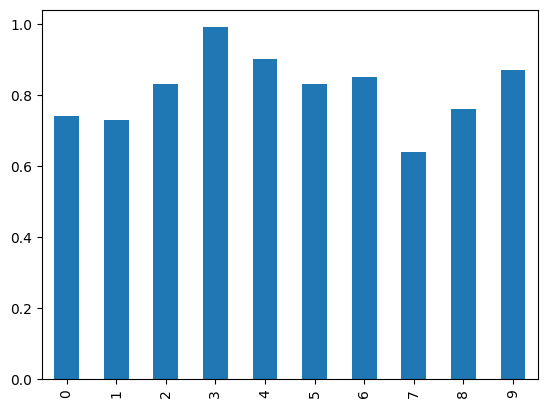

In [44]:
dataframe['segmented_data_classifier_data_positive'].astype('float').plot.bar()


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9')]

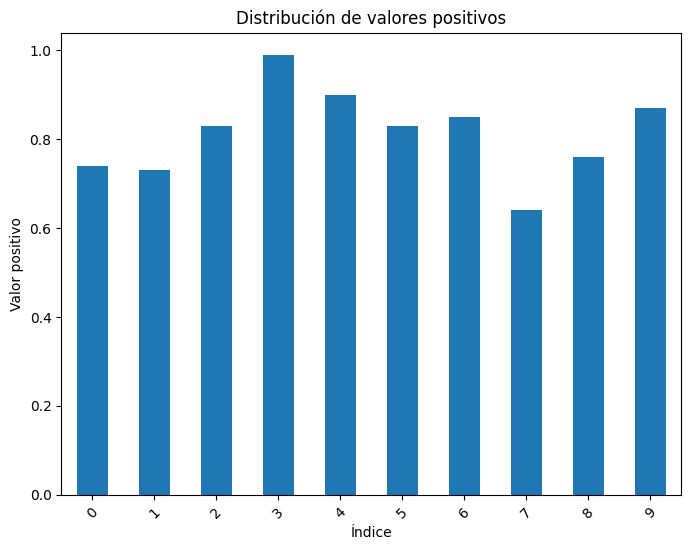

In [47]:
ax = dataframe['segmented_data_classifier_data_positive'].astype('float').plot.bar()
ax.set_title('Distribución de valores positivos')
ax.set_xlabel('Índice')
ax.set_ylabel('Valor positivo')
ax = dataframe['segmented_data_classifier_data_positive'].astype('float').plot.bar(color='green')
ax = dataframe['segmented_data_classifier_data_positive'].astype('float').plot.bar(figsize=(8, 6))
ax = dataframe['segmented_data_classifier_data_positive'].astype('float').plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# **Analisis de sentimiento negativo**

<Axes: >

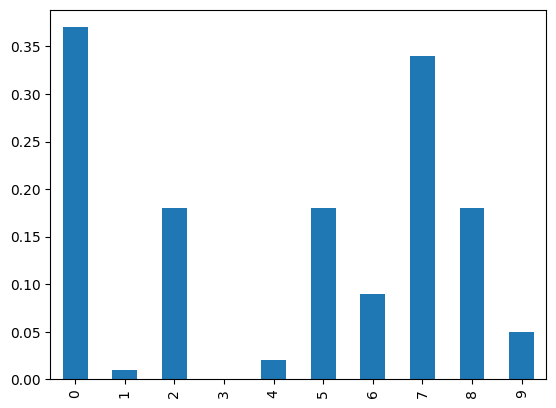

In [41]:
dataframe['segmented_data_classifier_data_negative'].astype('float').plot.bar()

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9')]

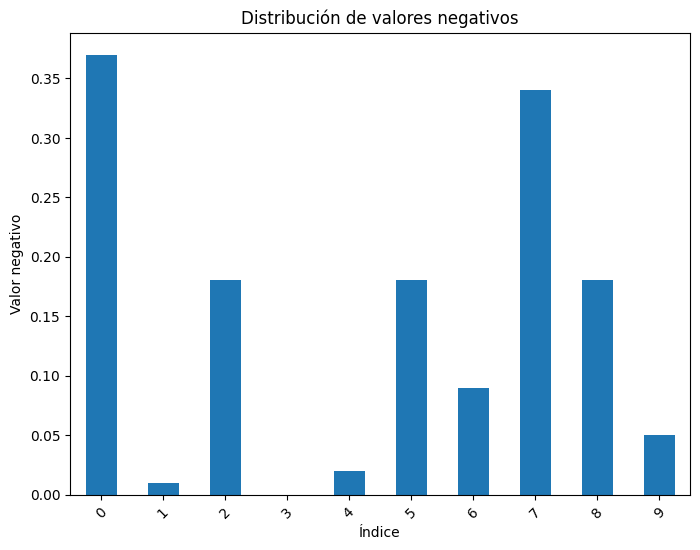

In [48]:
ax = dataframe['segmented_data_classifier_data_negative'].astype('float').plot.bar()
ax.set_title('Distribución de valores negativos')
ax.set_xlabel('Índice')
ax.set_ylabel('Valor negativo')
ax = dataframe['segmented_data_classifier_data_negative'].astype('float').plot.bar(color='red')
ax = dataframe['segmented_data_classifier_data_negative'].astype('float').plot.bar(figsize=(8, 6))
ax = dataframe['segmented_data_classifier_data_negative'].astype('float').plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


# **Diagrma de  silueta**

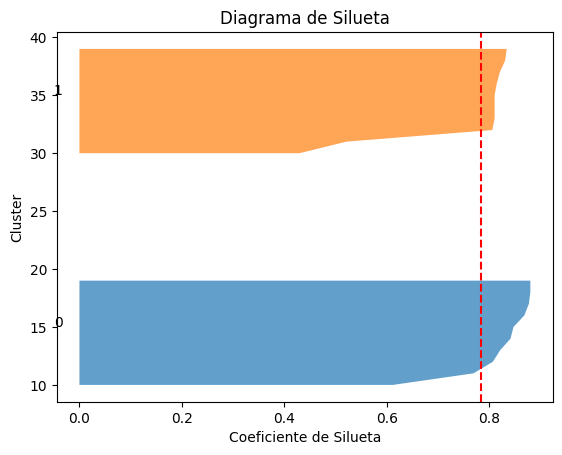

In [51]:
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Obtener los valores de los clusters positivos y negativos
positive_vals = dataframe['segmented_data_classifier_data_positive'].astype(float)
negative_vals = dataframe['segmented_data_classifier_data_negative'].astype(float)

# Concatenar los valores de los dos clusters
cluster_vals = np.concatenate((positive_vals, negative_vals))

# Crear las etiquetas de los clusters (0 para positivo, 1 para negativo)
cluster_labels = np.concatenate((np.zeros(len(positive_vals)), np.ones(len(negative_vals))))

# Calcular los coeficientes de silueta para cada muestra
silhouette_vals = silhouette_samples(cluster_vals.reshape(-1, 1), cluster_labels)

# Calcular el puntaje de silueta promedio
silhouette_avg = silhouette_score(cluster_vals.reshape(-1, 1), cluster_labels)

# Generar el diagrama de silueta
y_lower = 10
for i in range(2):  # Dos clusters: positivo y negativo
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()
    cluster_size = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + cluster_size

    # Rellenar la región del cluster con el color correspondiente
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7)

    # Etiquetar el cluster
    plt.text(-0.05, y_lower + 0.5 * cluster_size, str(i))

    # Calcular la nueva posición vertical para el siguiente cluster
    y_lower = y_upper + 10

# Línea vertical para el puntaje de silueta promedio
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

# Propiedades de la gráfica
plt.xlabel("Coeficiente de Silueta")
plt.ylabel("Cluster")
plt.title("Diagrama de Silueta")

# Mostrar el diagrama de silueta
plt.show()
